In [4]:
%load_ext autoreload
%autoreload 2
%matplotlib tk

from matplotlib import pyplot as pl
%matplotlib inline

import cksgaia
from cksgaia.cksgaia.plot.contour import period_contour_cks
from cksgaia.cksgaia.io import load_table

full_sample = load_table('cksgaia-planets-weights')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
read table cksgaia-planets-weights from load_table_cache.hdf


(0.4, 0.05)
901.0 0.04484103910061267
read table kic-filtered from load_table_cache.hdf


ValueError: unknown type object

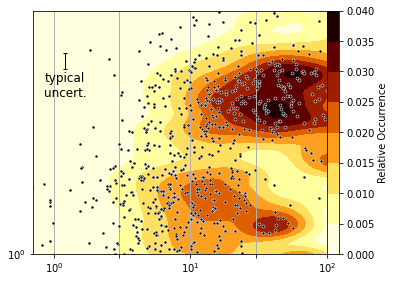

In [7]:
pl.clf()
# make the standard radius vs. period contour plot
period_contour_cks(sample=full_sample)
ax = pl.gca()

# add a custom point
ax.errorbar([4.79507], [2.77], xerr=[0], yerr=[0.12], 
            mew=1, fmt='w*', ms=10, ecolor='k', elinewidth=1.5, capthick=1.5)


In [43]:
pl.clf()

lowcut = 0.97

kicselect = load_table('kic-filtered')
kicselect = cksgaia.completeness.fit_cdpp(kicselect)

sample = full_sample.query('giso_smass < @lowcut')
kicsample = kicselect.query('m17_smass < @lowcut')

sample = cksgaia.completeness.get_weights(sample, kicsample)

# get 25% completeness limits
pl.figure(2)
cx, cy = cksgaia.completeness.get_sensitivity_contour(kicsample, 0.25)

pl.figure(1)
pl.subplots_adjust(right=0.91, left=0.15)
period_contour_cks(sample=sample, kwidth=(0.40, 0.05), vlims=(0.0, 0.025))

ax = pl.gca()
ax.errorbar([4.79507], [2.77], xerr=[0], yerr=[0.12], 
            mew=1, fmt='w*', ms=10, ecolor='k', elinewidth=1.5, capthick=1.5)


read table kic-filtered from load_table_cache.hdf
(0.4, 0.05)
335.0 0.0452918816241
read table kic-filtered from load_table_cache.hdf
